**1\. 2D minimization of a six-hump camelback function**

> $$f(x,y) = \left(4-2,1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$
ha molteplici minimi globali e locali.
- Trovare i minimi globali di questa funzione
- Quanti sono i minimi globali e qual è il valore della funzione in quei punti?
- Cosa succede per un'ipotesi iniziale di $(x, y) = (0, 0)$?

Suggerimenti:
>* Le variabili possono essere limitate a $-2 < x < 2$ e $-1 < y < 1$.
* Usare `numpy.meshgrid()` e `pylab.imshow()` per trovare visivamente le regioni.
* Usare `scipy.optimize.minimize()`, provando facoltativamente i suoi argomenti opzionali.

**2\. Curve fitting of temperature in Alaska** 

>Le temperature estreme in Alaska per ogni mese, a partire da gennaio, sono date da (in gradi Celsius):
```
max: 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18
min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58
```
* Tracciare le temperature.
* Trovare una funzione adatta a descrivere le temperature minime e massime. 
* Adattare questa funzione ai dati con `scipy.optimize.curve_fit()`.
* Tracciare il risultato. L'adattamento è ragionevole? Se no, perché?
* L'offset temporale per le temperature minime e massime è lo stesso entro la precisione dell'adattamento?

**3\.Temperature a Monaco**

>Ottenere il seguente file di dati:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

>che fornisce la temperatura di Monaco ogni giorno per diversi anni.
Adattare la seguente funzione ai dati:
$$f(t) = a \cos(2\pi t + b)+c$$
dove $t$ è il tempo in anni.
- Eseguire un grafico dei dati e del modello meglio adattato nell'intervallo 2008-2012.
   - Quali sono i valori migliori dei parametri?
   - Qual è la temperatura media complessiva di Monaco e quali sono i valori medi giornalieri tipici previsti dal modello per il periodo più freddo e più caldo dell'anno?
- (OPZIONALE) Ora adattate i dati con la funzione $g(x)$, che ha un parametro in più rispetto a $f(x)$. 
$$g(x) = a \cos(2\pi b t + c)+d$$
   - Quali sono gli RSS per $f(x)$ e $g(x)$?
   - Utilizzare il test F di Fisher per determinare se il parametro aggiuntivo è necessario.

In [2]:
import numpy as np


from scipy.optimize import curve_fit


def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)


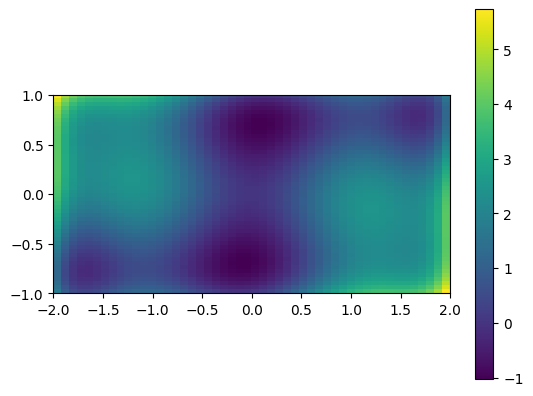

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

Text(0.5, 0.92, 'Six-hump Camelback function')

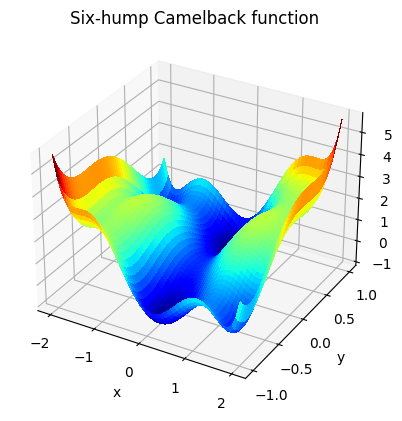

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')


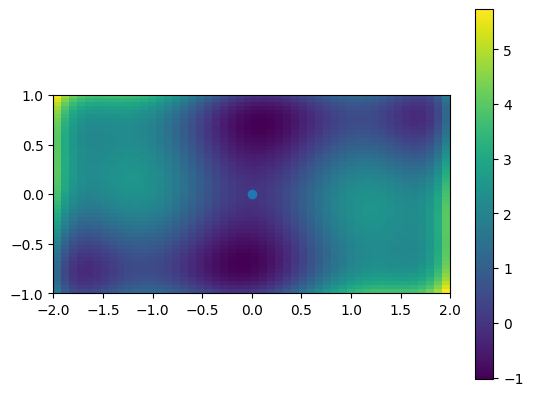

In [5]:
from scipy import optimize

x_min = optimize.minimize(sixhump, x0=[0, 0])

plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()


Text(0, 0.5, 'Min and max temperature')

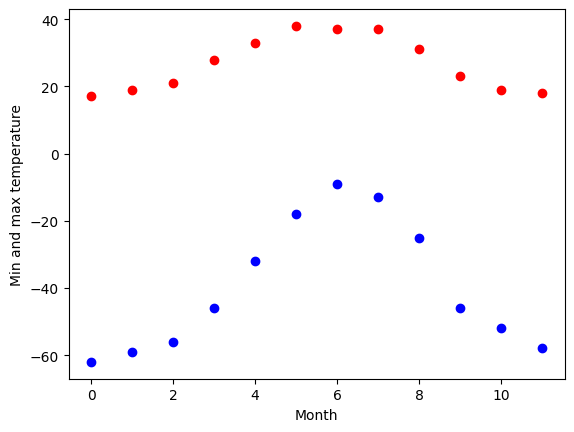

In [6]:
import numpy as np

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')


In [7]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

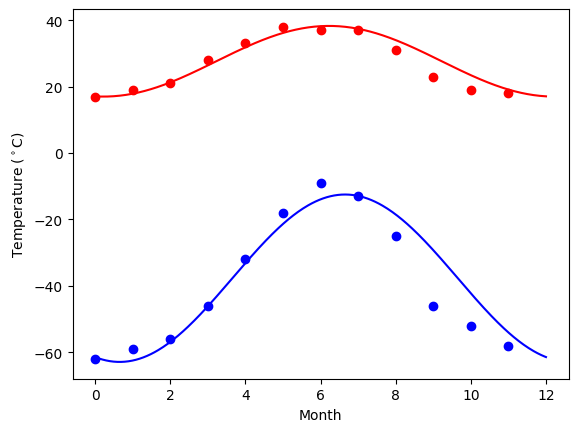

In [8]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


In [9]:
import numpy as np
date, temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temperature) < 90
date = date[keep]
temperature = temperature[keep]

In [10]:
def cosine(x, a, b, c):
    return a * np.cos(2 * np.pi * x + b) + c

In [11]:
popt, pcov = curve_fit(cosine, date, temperature)

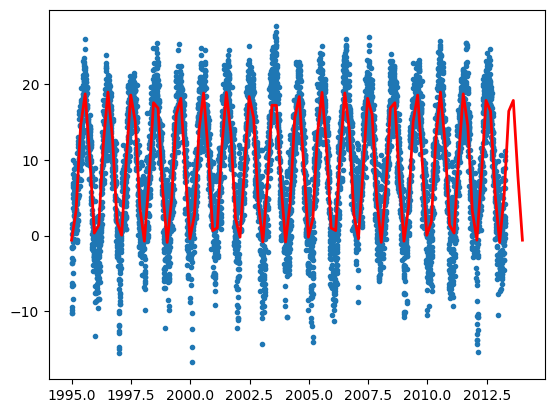

In [12]:


plt.plot(date, temperature, '.')
xfine = np.linspace(1995, 2014, 100)
plt.plot(xfine, cosine(xfine, *popt), color='red', lw=2)
     
